<a href="https://colab.research.google.com/github/Alihassoon93/data-science-machine-learning/blob/main/MNIST_datatest%2CPCA_%26_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import os


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
d0 = pd.read_csv("/content/drive/My Drive/Copy of mnist_train.csv")

print(d0.head(5))

   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


### Slice the data into class labels and dataset

In [ ]:
print(type(d0))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# save the labels into variable named "L"
L = d0['label']

In [ ]:
# now Drop the label feature and store the pixels data in "D"
D = d0.drop('label', axis=1)

In [ ]:
print(D.shape)
print(L.shape)

(42000, 784)
(42000,)


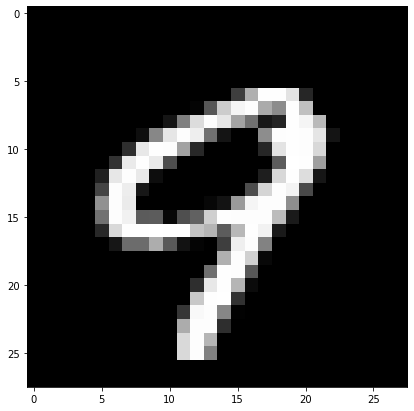

9


In [ ]:
# display or plot a number to make sure that "L" == "D"
plt.figure(figsize=(7,7)) # figure size is 7x7
idx = 100 #number of the index we wanna visualise
grid_data = D.iloc[idx].to_numpy().reshape(28,28) #get the data of[idx] & covert it to matrix & reshape it to 28X28 matrix
plt.imshow(grid_data, interpolation=None, cmap='gray') #(.imshow) is a tool to visulise images, cmap=color map "gray scale image"
plt.show()

print(L[idx]) #to verify its the correct image

### visulazition using PCA(the manual way)

In [ ]:
# Pick first 15K data-points to work on for time-effeciency.(we have to do it for all the date in real life projects)
label = L.head(15000)
data = D.head(15000)

print(data.shape)
print(label.shape)

(15000, 784)
(15000,)


In [ ]:
# Data-preprocessing: Standardizing the data ( make the mean=0 & the std=1)
from sklearn.preprocessing import StandardScaler 
standardized_data = StandardScaler().fit_transform(data) #take the data as an input and standerized to an output(standardized_data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
#find the co-variance matrix which is : A^T * A (assuming my sample_data is A)
sample_data = standardized_data # the standerdized data to compute co-variance the data must be standardized
covar_matrix = np.matmul(sample_data.T, sample_data) # now our data is a symmertric matrix (rows=columns)
print(covar_matrix.shape)

(784, 784)


In [ ]:
# finding the top two eigen-values and corresponding eigen-vectors 
# for projecting onto a 2-Dim space.

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values & vectors in asending order
# this code generates only the top 2 ( which is 782 and 783 (the highist 2 values) cuz its asending order.
values, vectors = eigh(covar_matrix, eigvals=(782,783)) # the eigenvalue of the top two (highist values&vector)
print("the shape of eigenvector" ,vectors.shape)

# converting the eigen vectors into (2d) shape for easyness of further computations
vectors = vectors.T
print("the updated shape of eigen vectors", vectors.shape)
# here the vectors[1] represent the eigen vector corresponding 1st principal eigen vector
# here the vectors[0] represent the eigen vector corresponding 2nd principal eigen vector

the shape of eigenvector (784, 2)
the updated shape of eigen vectors (2, 784)


In [ ]:
# projecting the original data sample on the plane 
#formed by two principal eigen vectors by vector-vector multiplication.
new_coordinates = np.matmul(vectors, sample_data.T) #multipling my top 2 eigenvectors with my sample data (transposed)
#we can see we have the 784 is in verctors is equal to the 784 in smaple_data so we can multiple
print (" resultanat new data points' shape ", vectors.shape, "X", sample_data.T.shape," = ", new_coordinates.shape)
#for each point we get 2d representaion
#now we will get new_coordiantes which has 2d representaion for every point

 resultanat new data points' shape  (2, 784) X (784, 15000)  =  (2, 15000)


In [ ]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, label)).T # stack(arrange) the data vertically with adding the lables column (everything Trasposed)

# creating a new data frame for ploting the labeled points(so we can visulise it)
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

#now we get our 2D data and the corresponding labels

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


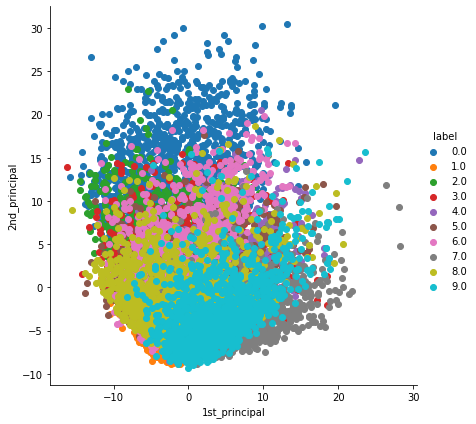

In [ ]:
# ploting the 2d data points with seaborn
import seaborn as sn
# ploting its using the datframe with labels are the coloring(hue) and the scatter plot( "1st_principal", "2nd_principal" as the axies).
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend() #the legend to show the label info.
plt.show()

(15000, 784)

### PCA using Scikit-Learn

In [ ]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# configuring the parameteres.
# the number of components = 2 (number of features or number of dimensionality).
pca.n_components = 2
pca_data = pca.fit_transform(sample_data) #the *column standardized* data.

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

#as we can see 1500 data point with two features(2D)

shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


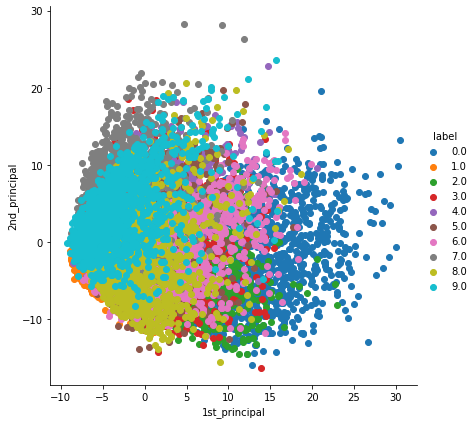

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, label)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()


#its the same like manual one except it is rotated a little bit

(15000, 784)

### PCA for dimensionality redcution (not for visualization)

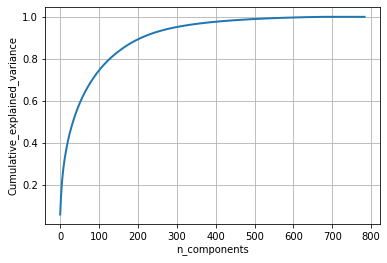

In [ ]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784 # we take all the data
pca_data = pca.fit_transform(sample_data) #the *column standardized* data.
#the explained variance divided by the sum of it
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_); # how to get the precentage of variance(spread) explained
# the cumalative sum (  lamda1 + lamda2 over sum of lamdas ....etc)
cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components') # the number of dimensionality that we can reduced corresponding to the precentage of rettained informations
plt.ylabel('Cumulative_explained_variance') #on scale of 100%
plt.show()


# If we take 200-dimensions, approx. 90% of variance is expalined.

(15000, 784)

### t-SNE using Scikit-Learn

In [ ]:
from sklearn.manifold import TSNE

# by making the random_state have a fixed number u will get alomst the same result 
# while if u did't put  any value it will be diffrent in each itreation
model = TSNE(n_components=2, random_state=0) 
# configuring the parameteres
# the number of components = 2 numbers of dimensions(visulaize it to 2d)
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

#the date should be standardized 
tsne_data = model.fit_transform(sample_data) #this one will create tsne model with 2d data



In [ ]:
# creating a new data frame & adding the labels which help us in ploting the result data
import seaborn as sn
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


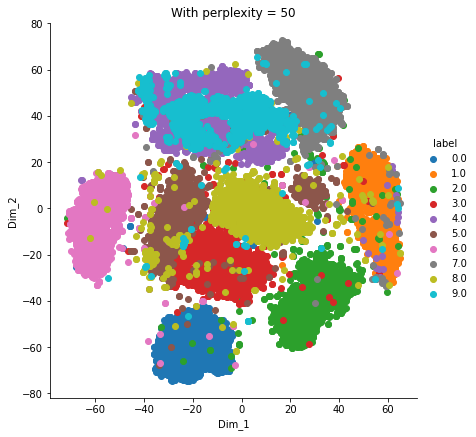

In [ ]:
# now increasing the perplexity to 50 so see if we can get a diffrent result

model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


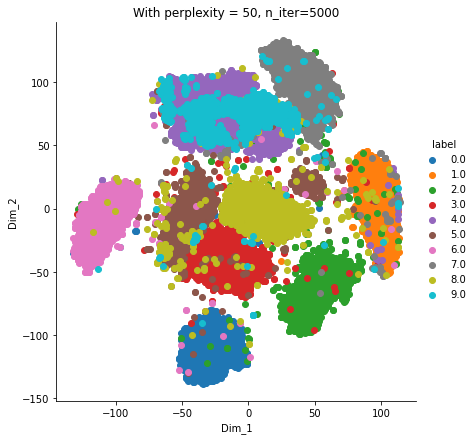

In [ ]:
# now with perplexity of 50 and itreation of 5000 (the default iteration is 1000)
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, label)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

# bottom line u gotta run diffrent preplexity and itreation to see by ureself which number is a good fit to visulaize the data